<a href="https://colab.research.google.com/github/Justus-coded/DPhi-Bootcamps/blob/master/Machine%20Learning%20Bootcamp/DPhi_Assignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install scikit-learn==0.23.1


     |████████████████████████████████| 6.9MB 5.2MB/s 
  Found existing installation: scikit-learn 0.22.2.post1
    Uninstalling scikit-learn-0.22.2.post1:
      Successfully uninstalled scikit-learn-0.22.2.post1
ERROR: Could not find a version that satisfies the requirement imblearn==0.4.3 (from versions: 0.0)
ERROR: No matching distribution found for imblearn==0.4.3


In [41]:
!pip install imblearn

In [6]:
import pandas as pd
insurance_data = pd.read_csv("https://github.com/dphi-official/Datasets/blob/master/travel_insurance/Training_set_label.csv?raw=true")

In [7]:
insurance_data.head()

,Agency,Agency Type,Distribution Channel,Product Name,Duration,Destination,Net Sales,Commision (in value),Gender,Age,Claim
0,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,61,UNITED KINGDOM,19.8,11.88,NaN,29,0
1,EPX,Travel Agency,Online,Cancellation Plan,93,NEW ZEALAND,63.0,0.00,NaN,36,0
2,EPX,Travel Agency,Online,2 way Comprehensive Plan,22,UNITED STATES,22.0,0.00,NaN,25,0
3,C2B,Airlines,Online,Silver Plan,14,SINGAPORE,54.5,13.63,M,24,0
4,EPX,Travel Agency,Online,Cancellation Plan,90,VIET NAM,10.0,0.00,NaN,23,0


In [9]:
df = insurance_data.copy()

In [10]:
df.isnull().sum()

Agency                      0
Agency Type                 0
Distribution Channel        0
Product Name                0
Duration                    0
Destination                 0
Net Sales                   0
Commision (in value)        0
Gender                  34361
Age                         0
Claim                       0
dtype: int64

In [11]:
import seaborn as sns

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f7c6d9e5ac8>]],
      dtype=object)

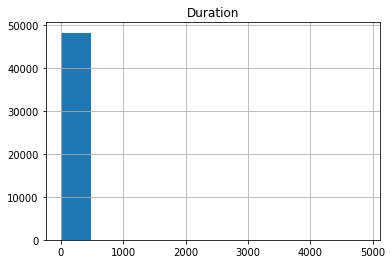

In [12]:
df.hist('Duration')

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


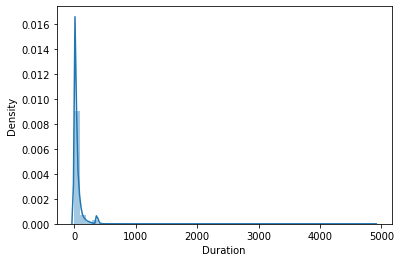

In [13]:
sns.distplot(df.Duration)

In [14]:
df.describe()

,Duration,Net Sales,Commision (in value),Age,Claim
count,48260.000000,48260.000000,48260.000000,48260.000000,48260.000000
mean,49.546602,40.747647,9.811735,39.927269,0.014671
std,104.828147,48.823217,19.695339,14.027329,0.120231
min,-2.000000,-389.000000,0.000000,0.000000,0.000000
25%,9.000000,18.000000,0.000000,35.000000,0.000000
50%,22.000000,27.000000,0.000000,36.000000,0.000000
75%,53.000000,48.000000,11.630000,43.000000,0.000000
max,4881.000000,666.000000,262.760000,118.000000,1.000000


In [16]:
df.value_counts('Gender')

Gender
M    7137
F    6762
dtype: int64

In [27]:
df['Gender'].fillna('Not Specified', inplace=True)

In [28]:
df

,Agency,Agency Type,Distribution Channel,Product Name,Duration,Destination,Net Sales,Commision (in value),Gender,Age,Claim
0,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,61,UNITED KINGDOM,19.8,11.88,Not Specified,29,0
1,EPX,Travel Agency,Online,Cancellation Plan,93,NEW ZEALAND,63.0,0.00,Not Specified,36,0
2,EPX,Travel Agency,Online,2 way Comprehensive Plan,22,UNITED STATES,22.0,0.00,Not Specified,25,0
3,C2B,Airlines,Online,Silver Plan,14,SINGAPORE,54.5,13.63,M,24,0
4,EPX,Travel Agency,Online,Cancellation Plan,90,VIET NAM,10.0,0.00,Not Specified,23,0
...,...,...,...,...,...,...,...,...,...,...,...
48255,EPX,Travel Agency,Online,2 way Comprehensive Plan,39,CHINA,44.0,0.00,Not Specified,36,0
48256,C2B,Airlines,Online,Bronze Plan,20,SINGAPORE,60.0,15.00,F,30,0
48257,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,19,AUSTRALIA,29.7,17.82,Not Specified,43,0
48258,EPX,Travel Agency,Online,2 way Comprehensive Plan,7,INDONESIA,20.0,0.00,Not Specified,61,0


In [29]:
df2 = df.drop (columns= ['Distribution Channel', 'Destination', 'Agency Type'])

In [30]:
df3 = pd.get_dummies(df2 , columns=['Agency','Gender', 'Product Name'] )

In [31]:
df3

,Duration,Net Sales,Commision (in value),Age,Claim,Agency_ADM,Agency_ART,Agency_C2B,Agency_CBH,Agency_CCR,Agency_CSR,Agency_CWT,Agency_EPX,Agency_JWT,Agency_JZI,Agency_KML,Agency_LWC,Agency_RAB,Agency_SSI,Agency_TST,Agency_TTW,Gender_F,Gender_M,Gender_Not Specified,Product Name_1 way Comprehensive Plan,Product Name_2 way Comprehensive Plan,Product Name_24 Protect,Product Name_Annual Gold Plan,Product Name_Annual Silver Plan,Product Name_Annual Travel Protect Gold,Product Name_Annual Travel Protect Platinum,Product Name_Annual Travel Protect Silver,Product Name_Basic Plan,Product Name_Bronze Plan,Product Name_Cancellation Plan,Product Name_Child Comprehensive Plan,Product Name_Comprehensive Plan,Product Name_Gold Plan,Product Name_Individual Comprehensive Plan,Product Name_Premier Plan,Product Name_Rental Vehicle Excess Insurance,Product Name_Silver Plan,Product Name_Single Trip Travel Protect Gold,Product Name_Single Trip Travel Protect Platinum,Product Name_Single Trip Travel Protect Silver,Product Name_Spouse or Parents Comprehensive Plan,Product Name_Ticket Protector,Product Name_Travel Cruise Protect,Product Name_Travel Cruise Protect Family,Product Name_Value Plan
0,61,19.8,11.88,29,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1,93,63.0,0.00,36,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,22,22.0,0.00,25,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,14,54.5,13.63,24,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,90,10.0,0.00,23,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48255,39,44.0,0.00,36,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
48256,20,60.0,15.00,30,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
48257,19,29.7,17.82,43,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
48258,7,20.0,0.00,61,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [32]:
X = df3.drop(columns=['Claim'])
y = df3['Claim']

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state= 101)

In [35]:
df3.Claim.value_counts()

0    47552
1      708
Name: Claim, dtype: int64

In [43]:
pip install six

In [45]:
import six
import sys
sys.modules['sklearn.externals.six'] = six
from imblearn.over_sampling import SMOTE


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [46]:
sm = SMOTE(random_state = 25, ratio=1.0)


In [51]:
X_train, y_train = sm.fit_sample(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [48]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

In [50]:
from sklearn.metrics import f1_score, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV


In [57]:
from sklearn.metrics import r2_score


In [53]:
pd.Series(y_train).value_counts()

1    33269
0    33269
dtype: int64

In [55]:
lr = LogisticRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [56]:
accuracy_score(y_test, y_pred)

0.824906755076668

In [62]:
f1_score(y_test, y_pred)

0.09107206884187881

In [63]:
dt = DecisionTreeClassifier(random_state=1)

In [64]:
dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

In [65]:
y_pred1 = dt.predict(X_test)

In [66]:
accuracy_score(y_test, y_pred1)


0.9634618041165907

In [67]:
f1_score(y_test, y_pred1)



0.0670194003527337

In [69]:
rf = RandomForestClassifier(random_state = 1)
rf.fit(X_train, y_train)
y_pred2 = rf.predict(X_test)

In [70]:
accuracy_score(y_test, y_pred2)


0.9732697886448405

In [71]:
f1_score(y_test, y_pred2)


0.06746987951807228

In [75]:
param = {'bootstrap': [True],
'max_depth': [10, 20],
'min_samples_leaf': [3, 4],
'min_samples_split': [4, 6],
'n_estimators': [100, 200]
    
}

grid_search_1 = GridSearchCV(estimator=rf, param_grid=param,cv = 3,n_jobs = -1,verbose = 2 )

In [76]:
param = {'max_leaf_nodes': [5, 10, 15, 20],
'min_samples_split': [4, 6, 8, 10]
}

grid_search_2 = GridSearchCV(estimator=dt, param_grid=param,cv = 3,n_jobs = -1,verbose = 2 )

In [80]:
grid_search_2.fit(X_train, y_train)
grid_search_2.best_params_

Fitting 3 folds for each of 16 candidates, totalling 48 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:    6.8s
[Parallel(n_jobs=-1)]: Done  48 out of  48 | elapsed:    8.6s finished


{'max_leaf_nodes': 20, 'min_samples_split': 4}

In [81]:
grid_search_1.fit(X_train, y_train)
grid_search_1.best_params_

Fitting 3 folds for each of 16 candidates, totalling 48 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done  48 out of  48 | elapsed:  4.0min finished


{'bootstrap': True,
 'max_depth': 20,
 'min_samples_leaf': 3,
 'min_samples_split': 4,
 'n_estimators': 100}

In [82]:
pred1 = grid_search_1.predict(X_test)
pred2 = grid_search_2.predict(X_test)


In [83]:
print(f1_score(pred1,y_test))
f1_score(pred2,y_test)

0.08378870673952642


0.11510791366906475

In [84]:

from sklearn.feature_selection import RFE #importing RFE class from sklearn library

rfe = RFE(estimator= rf , step = 1) 
# estimator clf_lr is the baseline model (basic model) that we have created under "Base line Model" selection
# step = 1: removes one feature at a time and then builds a model on the remaining features
# It uses the model accuracy to identify which features (and combination of features) contribute the most to predicting the target variable.
# we can even provide no. of features as an argument 

# Fit the function for ranking the features
fitt = rfe.fit(X_train, y_train)


In [87]:
fitt.n_features_

24

In [85]:
X_train_rfe = rfe.transform(X_train)
X_test_rfe = rfe.transform(X_test)
rfe_model = rf.fit(X_train_rfe, y_train)

In [86]:
y_pred_rfe = rfe_model.predict(X_test_rfe)

rfe_ac = accuracy_score(y_test, y_pred_rfe)
rfe_fscore = f1_score(y_test ,y_pred_rfe)

print("RFE Model Accuracy:", rfe_ac)
print("RFE Model F1 Score:", rfe_fscore)

RFE Model Accuracy: 0.973753280839895
RFE Model F1 Score: 0.06403940886699507
